In [1]:
import numpy as np 
import pandas as pd
#loading the csv file in a pandas dataframe
news_df = pd.read_csv("news_category.csv")

In [2]:
print("Total number of articles : ", news_df.shape[0])
print("Total number of unique categories : ", news_df["Category"].nunique())
print("Unique categories are : ", news_df["Category"].unique())

Total number of articles :  14400
Total number of unique categories :  4
Unique categories are :  ['Business News' 'Science-Technology News' 'Sports News' 'World News']


In [3]:
news_df["Category"].value_counts()

Science-Technology News    3700
Sports News                3650
World News                 3550
Business News              3500
Name: Category, dtype: int64

C:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0, 0, 'Business News'),
 Text(1, 0, 'Science-Technology News'),
 Text(2, 0, 'Sports News'),
 Text(3, 0, 'World News')]

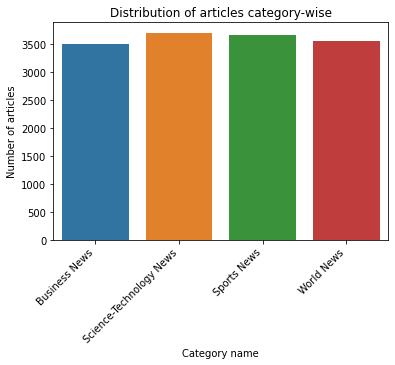

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

plot = sns.countplot(news_df["Category"])
plt.title("Distribution of articles category-wise")
plt.xlabel("Category name")
plt.ylabel("Number of articles")
plot.set_xticklabels(plot.get_xticklabels(), rotation = 45,horizontalalignment='right')

In [5]:
#We combine two columns "Title" and "Description" into a new column "news_summary" 
news_df["news_summary"] = news_df["Title"] + " " + news_df["Description"]

In [6]:
#Here we perform text preprocessing on raw data.

import nltk
import re
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

In [7]:
en_stopwords = set(stopwords.words('english'))
ps = WordNetLemmatizer()

In [8]:
#Here, we perform decontraction.
def decontract(text):
    text = re.sub(r"won\'t", "will not", text)
    text = re.sub(r"can\'t", "can not", text)
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)
    text = re.sub(r"\'m", " am", text)
    return text

In [13]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

def clean_text(text):
    text = text.lower()
    text = decontract(text)
    text = re.sub("\d+"," ",text)
    text = re.sub("\W"," ", text)
    text = re.sub("\s+"," ", text)
    tokens  = word_tokenize(text)
    new_tokens = [token for token in tokens if token not in en_stopwords]

    stemmed_tokens = [ps.lemmatize(tokens, pos ="n"and"v") for tokens in new_tokens]

    cleantext = " ".join(stemmed_tokens)

    return cleantext
news_df['news_summary'] = news_df['news_summary'].apply(lambda x: clean_text(x))

In [14]:
news_df['news_summary']

0        wall st bear claw back black reuters reuters s...
1        carlyle look toward commercial aerospace reute...
2        oil economy cloud stock outlook reuters reuter...
3        iraq halt oil export main southern pipeline re...
4        oil price soar time record pose new menace us ...
                               ...                        
14395    gandhi grandson urge palestinians march home r...
14396    six dead afghanistan explosion kabul afghanist...
14397    iraqi leaders meet peace effort baghdad iraq u...
14398    without power storm slam c mount pleasant c tr...
14399    evidence second plane back terror fear russian...
Name: news_summary, Length: 14400, dtype: object

In [15]:
#Bag of words is applied on clean text.

from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
extracted_features = vectorizer.fit_transform(news_df['news_summary']) #featurized data
vocabulary = vectorizer.get_feature_names()
print("Vocabulary : ", vectorizer.get_feature_names()) # to get unique words

# for better visualization
pd.DataFrame(extracted_features.toarray(), columns = vocabulary)

Vocabulary :  ['aa', 'aaa', 'aai', 'aalborg', 'aapl', 'aaron', 'aarrett', 'ab', 'abacha', 'abandon', 'abate', 'abbas', 'abbey', 'abby', 'abc', 'abdalla', 'abdallah', 'abdel', 'abdelkrim', 'abduct', 'abduction', 'abductions', 'abductors', 'abdul', 'abdullah', 'abdurahman', 'abe', 'aber', 'aberdeen', 'aberration', 'abet', 'abg', 'abia', 'abide', 'abidjan', 'abilities', 'ability', 'abkhazia', 'ablaze', 'able', 'abnormal', 'aboard', 'abolish', 'aboot', 'aboriginal', 'abortion', 'abortions', 'abortive', 'abound', 'abraham', 'abramovich', 'abrasive', 'abreast', 'abreu', 'abroad', 'abrupt', 'abruptly', 'absalon', 'absence', 'absent', 'absentee', 'absenteeism', 'absentia', 'absolute', 'absolutely', 'absolve', 'absorb', 'abu', 'abuja', 'abundance', 'abundant', 'abuse', 'abusers', 'abusive', 'abut', 'abuzz', 'abv', 'ac', 'acacia', 'academic', 'academics', 'academies', 'academy', 'acadian', 'acasuso', 'acc', 'accc', 'accelerate', 'acceleration', 'accelerators', 'accent', 'accept', 'acceptable', '

,aa,aaa,aai,aalborg,aapl,aaron,aarrett,ab,abacha,abandon,...,zoysa,zsuzsanna,zucchini,zurab,zurich,zvezda,zviadauri,zvidauri,zvonareva,zwick
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14395,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14396,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14397,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14398,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
#TF-IDF is applied on clean text to featurize data.

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()
extracted_features = tfidf_vectorizer.fit_transform(news_df['news_summary']) #featurized data
vocabulary = tfidf_vectorizer.get_feature_names()
print("Vocabulary : ", tfidf_vectorizer.get_feature_names()) # to get unique words

# for better visualization
pd.DataFrame(extracted_features.toarray(), columns = vocabulary)

Vocabulary :  ['aa', 'aaa', 'aai', 'aalborg', 'aapl', 'aaron', 'aarrett', 'ab', 'abacha', 'abandon', 'abate', 'abbas', 'abbey', 'abby', 'abc', 'abdalla', 'abdallah', 'abdel', 'abdelkrim', 'abduct', 'abduction', 'abductions', 'abductors', 'abdul', 'abdullah', 'abdurahman', 'abe', 'aber', 'aberdeen', 'aberration', 'abet', 'abg', 'abia', 'abide', 'abidjan', 'abilities', 'ability', 'abkhazia', 'ablaze', 'able', 'abnormal', 'aboard', 'abolish', 'aboot', 'aboriginal', 'abortion', 'abortions', 'abortive', 'abound', 'abraham', 'abramovich', 'abrasive', 'abreast', 'abreu', 'abroad', 'abrupt', 'abruptly', 'absalon', 'absence', 'absent', 'absentee', 'absenteeism', 'absentia', 'absolute', 'absolutely', 'absolve', 'absorb', 'abu', 'abuja', 'abundance', 'abundant', 'abuse', 'abusers', 'abusive', 'abut', 'abuzz', 'abv', 'ac', 'acacia', 'academic', 'academics', 'academies', 'academy', 'acadian', 'acasuso', 'acc', 'accc', 'accelerate', 'acceleration', 'accelerators', 'accent', 'accept', 'acceptable', '

,aa,aaa,aai,aalborg,aapl,aaron,aarrett,ab,abacha,abandon,...,zoysa,zsuzsanna,zucchini,zurab,zurich,zvezda,zviadauri,zvidauri,zvonareva,zwick
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14395,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14396,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14397,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14398,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
